# Importing Necessary packages

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Importing data set

In [3]:
src = pd.read_csv("Ecommerce - UK Retailer.csv", encoding="ISO-8859-1")
src.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Basic EDA

In [4]:
src.shape

(541909, 8)

In [5]:
src.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
src['InvoiceNo'].unique()[:30]

array(['536365', '536366', '536367', '536368', '536369', '536370',
       '536371', '536372', '536373', '536374', '536375', '536376',
       '536377', '536378', '536380', '536381', 'C536379', '536382',
       'C536383', '536384', '536385', '536386', '536387', '536388',
       '536389', '536390', 'C536391', '536392', '536393', '536394'],
      dtype=object)

## 1a Perform Basic EDA - Boxplot – All Numeric Variables

<AxesSubplot:>

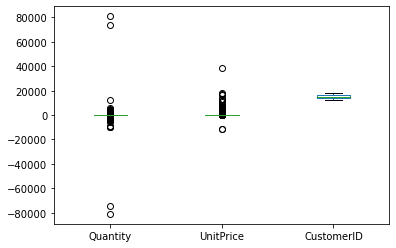

In [7]:
src[src.select_dtypes(np.number).columns].plot(kind = 'box')

<AxesSubplot:>

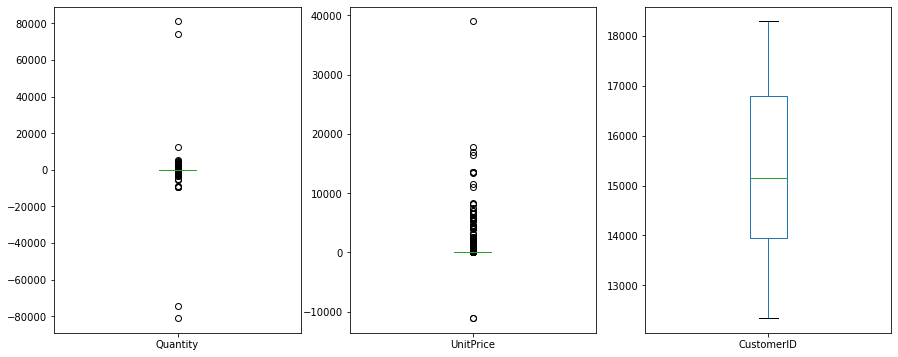

In [8]:
plt.figure(figsize = (15,6))

plt.subplot(1, 3, 1)
src['Quantity'].plot(kind = 'box')

plt.subplot(1, 3, 2)
src['UnitPrice'].plot(kind = 'box')

plt.subplot(1, 3, 3)
src['CustomerID'].plot(kind = 'box')

## 1b Perform Basic EDA - Histplot – All Numeric Variables

<AxesSubplot:ylabel='Frequency'>

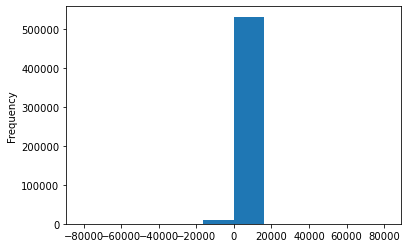

In [9]:
src['Quantity'].plot(kind = 'hist')

In [10]:
src[src['Quantity'] < 0].shape

(10624, 8)

<AxesSubplot:ylabel='Frequency'>

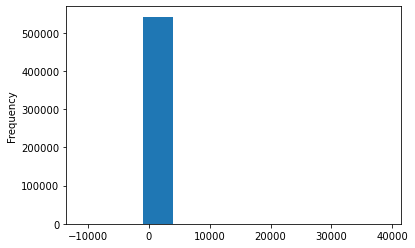

In [11]:
src['UnitPrice'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

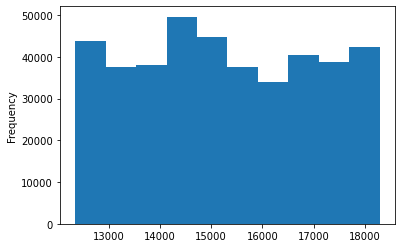

In [12]:
src['CustomerID'].plot(kind = 'hist')

## 1c Perform Basic EDA - Distribution plot – All Numeric Variables

In [13]:
src.select_dtypes('number').columns

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

C:\Users\sragh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

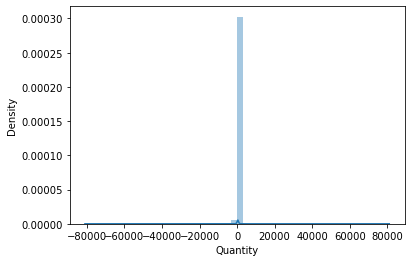

In [14]:
sns.distplot(a = src['Quantity'])

C:\Users\sragh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

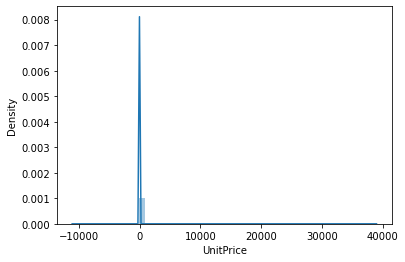

In [15]:
sns.distplot(a = src['UnitPrice'])

C:\Users\sragh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

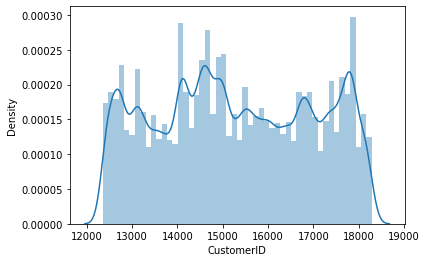

In [16]:
sns.distplot(a = src['CustomerID'])

## 1d Perform Basic EDA - Aggregation – All Numeric Variables

In [17]:
src.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


## 1e Perform Basic EDA - Unique Value – All Columns

In [18]:
for i in src.columns:
    print(i)
    print(src[i].unique())
    print('\n\n')

InvoiceNo
['536365' '536366' '536367' ... '581585' '581586' '581587']



StockCode
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']



Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']



Quantity
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     

## 1f Perform Basic EDA -  Duplicate Value – All Columns

In [19]:
src[src.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


## 1g Perform Basic EDA -  Correlation: HeatMap – All Columns

<AxesSubplot:>

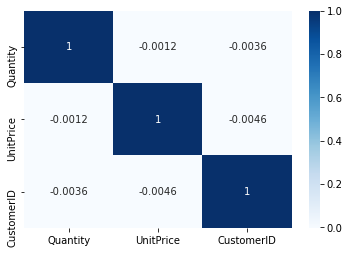

In [20]:
sns.heatmap(src.corr(), annot=True, cmap = 'Blues')

## 1h Perform Basic EDA - Regression Plot - All Numeric Variables

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

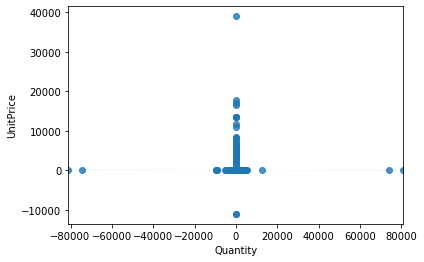

In [21]:
sns.regplot(x = 'Quantity', y = 'UnitPrice', data = src)

<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>

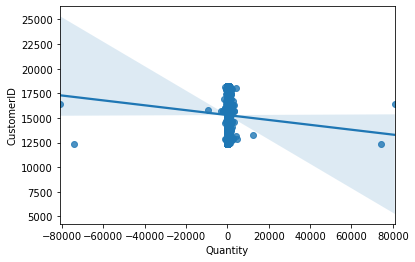

In [22]:
sns.regplot(x = 'Quantity', y = 'CustomerID', data = src)

<AxesSubplot:xlabel='UnitPrice', ylabel='CustomerID'>

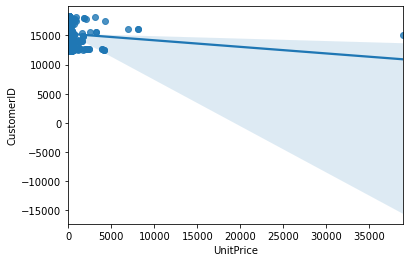

In [23]:
sns.regplot(x = 'UnitPrice', y = 'CustomerID', data = src)

## 1i Perform Basic EDA - Bar Plot – Every Categorical Variable vs every Numerical Variable

<AxesSubplot:xlabel='Description', ylabel='Quantity'>

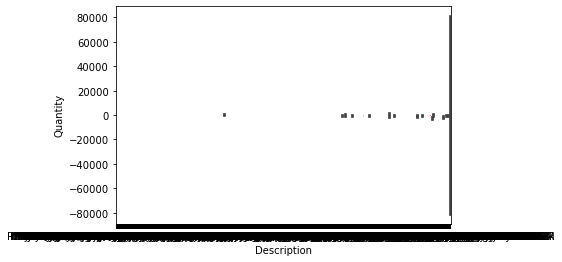

In [24]:
sns.barplot(x = 'Description', y = 'Quantity', data = src)

<AxesSubplot:xlabel='Description', ylabel='UnitPrice'>

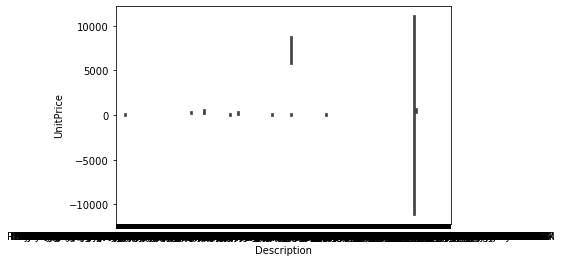

In [25]:
sns.barplot(x = 'Description', y = 'UnitPrice', data = src)

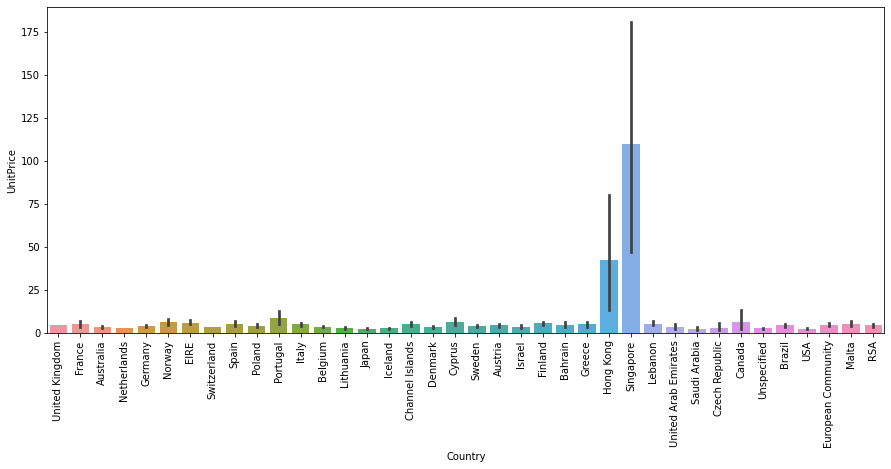

In [27]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x = 'Country', y = 'UnitPrice', data = src)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.show()

## 1j Perform Basic EDA - Pair Plot – Every Numerical Variable

In [56]:
sns.pairplot(src, vars = ['Quantity', 'UnitPrice'])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002219ABE93A8> (for post_execute):


KeyboardInterrupt: 

## 1k Perform Basic EDA - Plot the skewness – Every Numerical Variable

ERROR! Session/line number was not unique in database. History logging moved to new session 1856


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

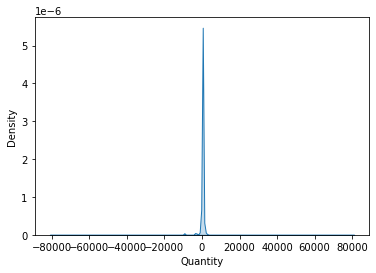

In [28]:
sns.kdeplot(src['Quantity'], shade = True)

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

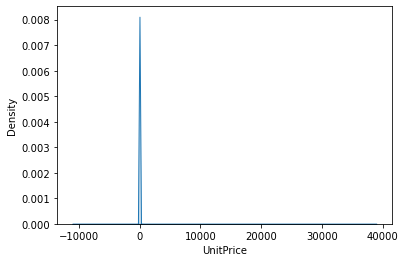

In [29]:
sns.kdeplot(src['UnitPrice'], shade = True)

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

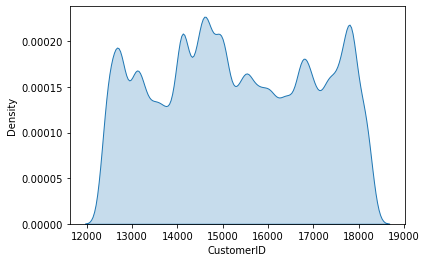

In [30]:
sns.kdeplot(src['CustomerID'], shade = True)

## 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [31]:
(src.isna().mean() * 100).sort_values(ascending = False)

CustomerID     24.926694
Description     0.268311
Country         0.000000
UnitPrice       0.000000
InvoiceDate     0.000000
Quantity        0.000000
StockCode       0.000000
InvoiceNo       0.000000
dtype: float64

In [32]:
# Since there are no outliers in CustomerID column, imputing with mean
src['CustomerID'].fillna(value = src['CustomerID'].mean(), inplace = True)

In [33]:
# Since Desciption is a categorical column, imputing can be done with mode
src['Description'].fillna(value = src['Description'].mode()[0], inplace = True)

In [34]:
(src.isna().mean() * 100).sort_values(ascending = False)

Country        0.0
CustomerID     0.0
UnitPrice      0.0
InvoiceDate    0.0
Quantity       0.0
Description    0.0
StockCode      0.0
InvoiceNo      0.0
dtype: float64

## 3. Remove duplicate rows

In [35]:
src.shape

(541909, 8)

In [36]:
src.drop_duplicates(inplace = True)

In [37]:
src.shape

(536641, 8)

## 4. Remove rows which have negative values in Quantity column

In [38]:
src = src.loc[src['Quantity'] > 0, :]

## 5. Add the columns - Month, Day and Hour for the invoice

In [39]:
src['InvoiceDate'].dtypes

dtype('O')

In [40]:
# Converting the datatype from 'object' to 'datetime' format
src['InvoiceDate'] = pd.to_datetime(src['InvoiceDate'])
src['InvoiceDate'].dtypes

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('<M8[ns]')

In [41]:
src['Month'] = src['InvoiceDate'].dt.month

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
src['Day'] = src['InvoiceDate'].dt.day
src.loc[50000, ['Day', 'InvoiceDate']]

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Day                              9
InvoiceDate    2011-01-09 15:18:00
Name: 50000, dtype: object

In [43]:
src['Hour'] = src['InvoiceDate'].dt.hour
src.loc[50000, ['Hour', 'InvoiceDate']]

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Hour                            15
InvoiceDate    2011-01-09 15:18:00
Name: 50000, dtype: object

## 6. How many orders made by the customers?

In [44]:
# Since each Invoice ID represents a customer
src['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
572293       1
543460       1
572072       1
551595       1
571916       1
Name: InvoiceNo, Length: 20728, dtype: int64

## 7. TOP 5 customers with higher number of orders

In [45]:
# Since each Invoice ID represents a customer
src['InvoiceNo'].value_counts().head()

573585    1114
581219     749
581492     731
580729     721
558475     705
Name: InvoiceNo, dtype: int64

## 8. How much money spent by the customers?.

In [46]:
src['Total'] = src['UnitPrice'] * src['Quantity']

C:\Users\sragh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
src.groupby('InvoiceNo').agg({'Total': 'sum'})

,Total
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
581586,339.20
581587,249.45
A563185,11062.06


## 9. TOP 5 customers with highest money spent

In [48]:
src.groupby('InvoiceNo').agg({'Total': 'sum'}).sort_values(ascending = False, by = 'Total').head()

,Total
InvoiceNo,
581483,168469.60
541431,77183.60
574941,52940.94
576365,50653.91
556444,38970.00


## 10. How many orders per month?

<AxesSubplot:xlabel='Month'>

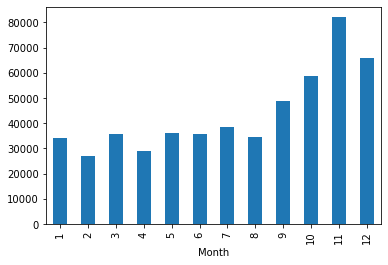

In [49]:
src.groupby('Month').count()['InvoiceNo'].plot(kind = 'bar')

## 11. How many orders per day?

<AxesSubplot:xlabel='Day'>

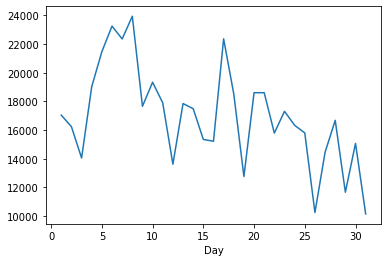

In [50]:
src.groupby('Day').count()['InvoiceNo'].plot(kind = 'line')

## 12. How many orders per hour?

<AxesSubplot:xlabel='Hour'>

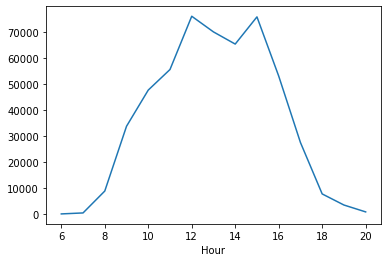

In [51]:
src.groupby('Hour').count()['InvoiceNo'].plot(kind = 'line')

## 13. How many orders for each country?

<AxesSubplot:xlabel='Country'>

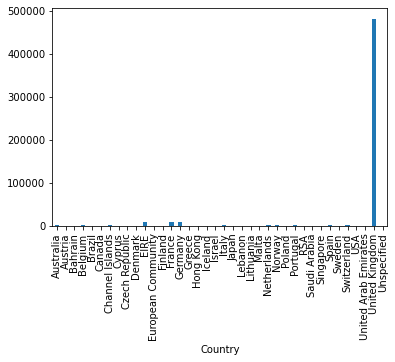

In [52]:
src.groupby('Country').count()['InvoiceNo'].plot(kind = 'bar')

## 14. Orders trend across months

<AxesSubplot:xlabel='Month'>

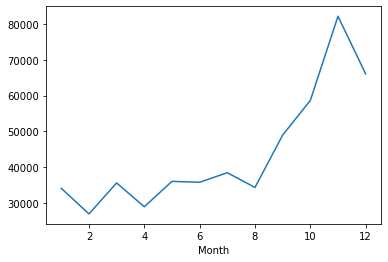

In [53]:
src.groupby('Month').count()['InvoiceNo'].plot(kind = 'line')

## 15. How much money spent by each country?

<AxesSubplot:ylabel='Country'>

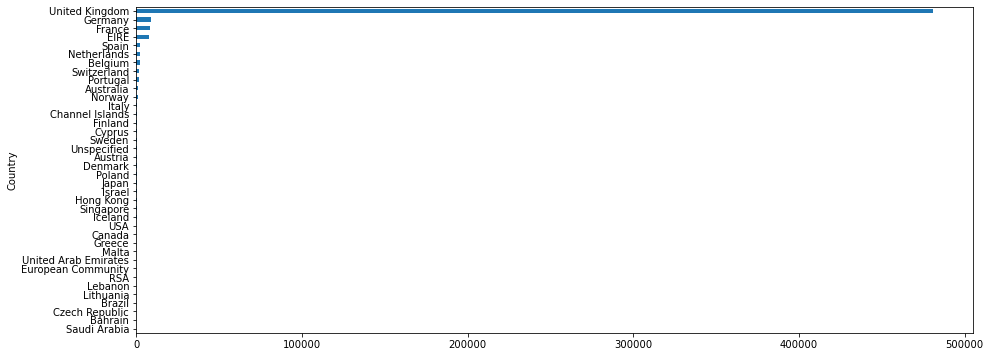

In [54]:
plt.figure(figsize=(15, 6))
src.groupby('Country').count()['InvoiceNo'].sort_values().plot(kind = 'barh')